# Probability

- Random Variable
- Intersection, Union
- Independent Variable
- Complementary Event
- Conditional Probability
- Bayes Theorem

Exercise
- import data
- compute basic probabilities
- create bollinger bands
- compute conditional probability of increase


## Random Variable


## Intersection - AND
Probability that event A AND event B have occured
eg compute the probability that gogle and amazon prices have incread together




## Union - OR
Probability that only event A OR only event B OR BOTH have occured
eg compute the probability atleast one of the stocks have a positive return ie if we compute the union of gpogle and amazon's probability of postitive return then we can get the probability that atleast one will have a positive return

## Independent Events

One event doesnt affect the other. Not very useful in fincance since most events in the markets are dependent on one another

## Dependent Events - Baye's Theorem
Probability of A given B has already occured

https://www.youtube.com/watch?v=HZGCoVF3YvM

https://www.youtube.com/watch?v=U_85TaXbeIo

## Conditional Probability on Stock Prices

In [2]:
!pip install yfinance

In [3]:
!pip install scipy==1.7.1

ERROR: Could not find a version that satisfies the requirement scipy==1.7.1 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0b1, 1.0.0rc1, 1.0.0rc2, 1.0.0, 1.0.1, 1.1.0rc1, 1.1.0, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0rc1, 1.4.0rc2, 1.4.0, 1.4.1, 1.5.0rc1, 1.5.0rc2, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0rc1, 1.6.0rc2, 1.6.0, 1.6.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3, 1.8.0rc4, 1.8.0)
ERROR: No matching distribution found for scipy==1.7.1


In [4]:
!pip install ta

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [6]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

In [7]:
# Import google data in the form of percent change
df = yf.download("GOOG")[["Adj Close"]].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019
...,...
2022-04-12,-0.010956
2022-04-13,0.014890
2022-04-14,-0.023280


In [8]:
# COMPUTE CHANCE OF INCREASE
# Select those values of the dataframe whose percent change 
# is greater than zero
# Count the lendth of the dataframe comtining t he filtered values
# Divide it by total values in the dataframe
p_increase = len(df[df["Adj Close"] > 0])/len(df)*100

# COMPUTE CHANCE OF DECREASE
# Select those values of the dataframe whose percent change 
# is less than zero
# Count the lendth of the dataframe comtining t he filtered values
# Divide it by total values in the dataframe
p_decrease = len(df[df["Adj Close"] < 0])/len(df)*100
    
    # %Increase + %Descrease close to one but not mandatory equal 1
print(f"Weights| \t Increase: {'%.2f' % p_increase} \t Decrease: {'%.2f' % p_decrease}")

Weights| 	 Increase: 52.62 	 Decrease: 47.36


## Conditional Probability

In [9]:
# From Technical Analysis module and volatility submodule import bollinger bands class
# Import Bollinger Band Class
from ta.volatility import BollingerBands

#### Bollinger Bands
A Bollinger Band is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.

designed to discover opportunities that give investors a higher probability of properly identifying when an asset is oversold or overbought.

  * Middle Band = 20-day simple moving average (SMA)
  * Upper Band = 20-day SMA + (20-day standard deviation of price x 2) 
  * Lower Band = 20-day SMA - (20-day standard deviation of price x 2)

In [10]:
# Import Close Price
df = yf.download("EURUSD=X")[["Adj Close"]]

# Create a Returns Column in the dataframe
df['return'] = df['Adj Close'].pct_change(1).dropna()

[*********************100%***********************]  1 of 1 completed


In [11]:
# Initialize bollinger band class
bolband  = BollingerBands(close = df["Adj Close"], window = 20, window_dev = 1.5)

# Add bollinger band features
# Moving average - Center Line
df["movingAvg"] = bolband.bollinger_mavg()

# Higher Band
df["higherBand"] = bolband.bollinger_hband()

# Lower Band
df["lowerBand"] = bolband.bollinger_lband()


In [12]:
df[['Adj Close', 'higherBand', 'lowerBand']]

,Adj Close,higherBand,lowerBand
Date,,,
2003-12-01,1.196501,NaN,NaN
2003-12-02,1.208897,NaN,NaN
2003-12-03,1.212298,NaN,NaN
2003-12-04,1.208094,NaN,NaN
2003-12-05,1.218695,NaN,NaN
...,...,...,...
2022-04-13,1.082614,1.112064,1.086042
2022-04-14,1.089657,1.111739,1.085113
2022-04-15,1.082099,1.110742,1.083325


<AxesSubplot:xlabel='Date'>

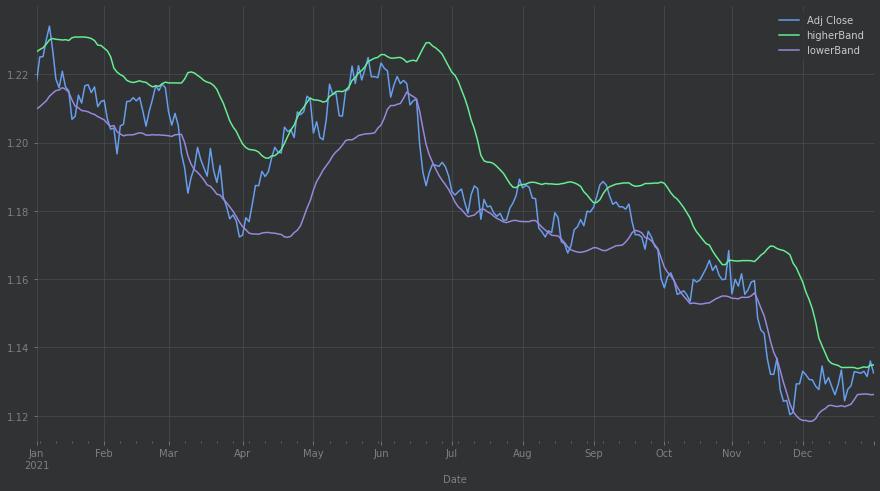

In [13]:
# Plot the three Bollinger Bands for a single year ()

df[['Adj Close', 'higherBand', 'lowerBand']].loc['2021'].plot(figsize = (15,8))

In [19]:
# Import close price
df = yf.download('ETH-USD')[['Adj Close']]

# Create returns colums as pct change of adj close and drop the na values
df['returns'] = df['Adj Close'].pct_change(1).dropna()

# Initialize bollinger bands class with closing price 
# close (pandas.Series) – dataset ‘Close’ column.
# window (int) – n period.
# window_dev (int) – n factor standard deviation
bolband = BollingerBands(close = df['Adj Close'], window = 20, window_dev=1.5)

# Add bollinger band features
# Moving Average
df['movingAvg'] = bolband.bollinger_mavg()
# Higher Band
df["higherBand"] = bolband.bollinger_hband()
# Lower Band
df['lowerBand'] = bolband.bollinger_lband()

# Shift Values of price and bollinger bands by 1
df["Adj Close Yesterday"] = df["Adj Close"].shift(1)
df["Higher Band Yesterday"] = df["higherBand"].shift(1)

# Drop row containing missing values
df = df.dropna()

# Variable Initialization
n = 10 # Number of days after signal
dates = []
returns = []

for i in range(len(df)-n-1):
    row = df.iloc[i:i+1,:]
    # Create a signal condition
    if (row["Adj Close Yesterday"].values[0] < \
        row["Higher Band Yesterday"].values[0]) and \
        (row["Adj Close"].values[0] > row["higherBand"].values[0]):
        # Save the date
        dates.append(row.index[0])
        # Compute the returns from signal to 10 days later
        ret = []
        for day in range(1,n):
            ret.append(df.iloc[i+day:i+1+day,:]["returns"].values[0])
        returns.append(ret)
        
# List of lists to dataframe
df_returns = pd.DataFrame(returns).cumsum(axis=1)    


[*********************100%***********************]  1 of 1 completed


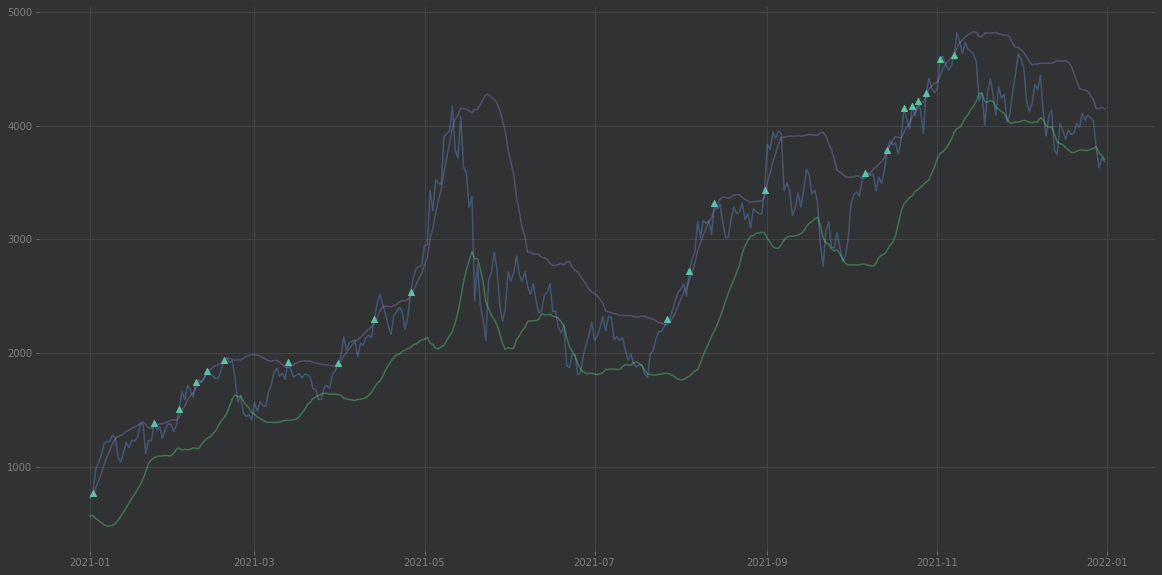

In [27]:
idx = dates
year="2021"

# Setup the figure
plt.figure(figsize=(20,10))

# Plot the points 
plt.scatter(df.loc[idx].loc[year].index, df.loc[idx]["Adj Close"].loc[year], color= "#57CE95", marker="^")


# Plot the rsi to be sure that the conditions are completed
plt.plot(df["Adj Close"].loc[year].index, df["Adj Close"].loc[year], alpha=0.35)
plt.plot(df["lowerBand"].loc[year].index, df["lowerBand"].loc[year], alpha=0.35)
plt.plot(df["higherBand"].loc[year].index, df["higherBand"].loc[year], alpha=0.35)

plt.show()

In [24]:
# Compute increase and decrease percentages

for i in range(n-1):
    g = df_returns.iloc[:, i:i+1].values
    p_increase = len(g[g>0])/len(g)*100
    p_decrease = len(g[g<0])/len(g)*100
    print(f"Weights day {i+1}| \t Increase: {'%.2f' % p_increase} %\t Decrease: {'%.2f' % p_decrease} %")
print(" ")
    

# Compute %Increase %Decrease of the asset on all the situations
p_increase = len(df[df["returns"]>0])/len(df)*100
p_decrease = len(df[df["returns"]<0])/len(df)*100
print(f"Weights| \t Increase: {'%.2f' % p_increase} % \t Decrease: {'%.2f' % p_decrease} % ")

Weights day 1| 	 Increase: 54.67 %	 Decrease: 45.33 %
Weights day 2| 	 Increase: 60.00 %	 Decrease: 40.00 %
Weights day 3| 	 Increase: 66.67 %	 Decrease: 33.33 %
Weights day 4| 	 Increase: 62.67 %	 Decrease: 37.33 %
Weights day 5| 	 Increase: 65.33 %	 Decrease: 34.67 %
Weights day 6| 	 Increase: 65.33 %	 Decrease: 34.67 %
Weights day 7| 	 Increase: 66.67 %	 Decrease: 33.33 %
Weights day 8| 	 Increase: 69.33 %	 Decrease: 30.67 %
Weights day 9| 	 Increase: 68.00 %	 Decrease: 32.00 %
 
Weights| 	 Increase: 52.03 % 	 Decrease: 47.97 % 


In [25]:
dft = df["Adj Close"].pct_change(n).dropna()

# Compute %Increase %Decrease of the asset on all the situations
p_increase = len(dft[dft>0])/len(dft)*100
p_decrease = len(dft[dft<0])/len(dft)*100
print(f"Weights| \t Increase: {'%.2f' % p_increase} % \t Decrease: {'%.2f' % p_decrease} % ")

Weights| 	 Increase: 55.12 % 	 Decrease: 44.88 % 
